In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: Load the data
# Load each sheet into a separate DataFrame
court_disposal_2021 = pd.read_excel('/content/drive/My Drive/Dataset_EDA/2/Court Disposal 2021.xlsx')
court_disposal_2022 = pd.read_excel('/content/drive/My Drive/Dataset_EDA/2/Court Disposal 2022.xlsx')
police_disposal_2021 = pd.read_excel('/content/drive/My Drive/Dataset_EDA/2/Police Disposal 2021.xlsx')
police_disposal_2022 = pd.read_excel('/content/drive/My Drive/Dataset_EDA/2/Police Disposal 2022.xlsx')


1. **Trend Analysis by Crime Head**

•	Plot: Bar charts comparing Total FIRs, Cases Disposed Off by Police, and Cases Disposed Off by Courts for each crime head. This would help visualize which crimes have the most reports and disposals.

•	Objective: Identify crime heads with high reporting but low disposal rates or vice versa.

<Figure size 2500x800 with 0 Axes>

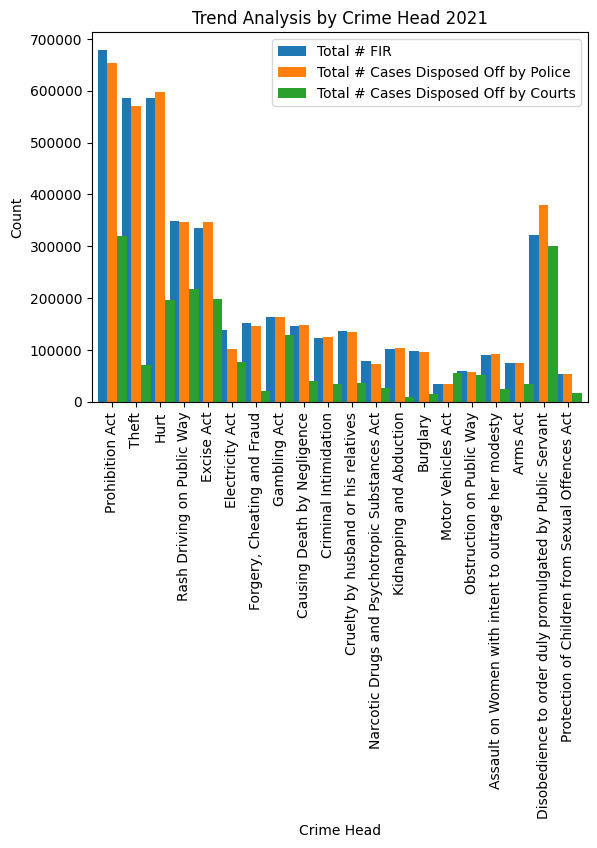

<Figure size 3000x800 with 0 Axes>

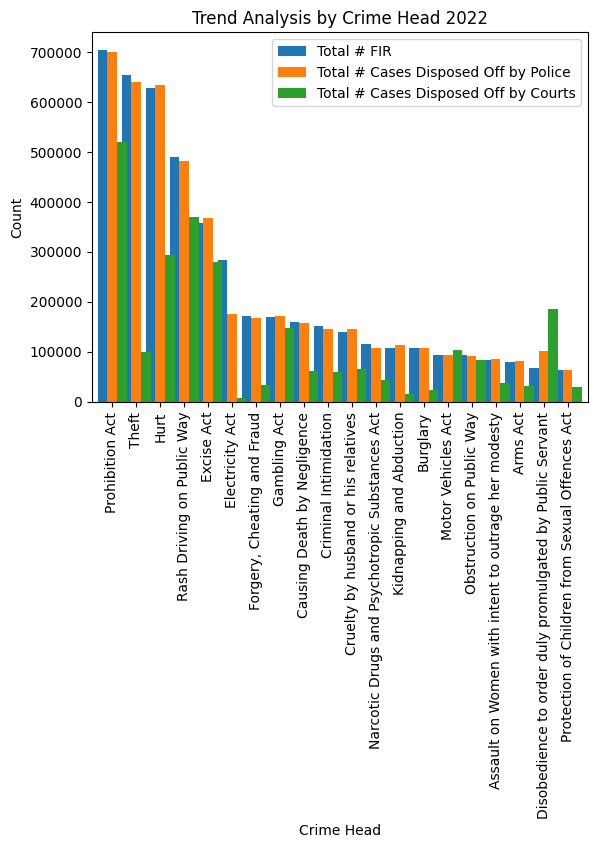

In [3]:
# Merge police and court data by 'Crime Head'
merged_data21 = pd.merge(police_disposal_2021, court_disposal_2021, on='Crime Head', suffixes=('_Police', '_Court'))

# Plot: Bar charts comparing Total FIRs, Cases Disposed Off by Police, and Cases Disposed Off by Courts for each crime head.
plt.figure(figsize=(25, 8))
merged_data21.set_index('Crime Head')[['Total # FIR', 'Total # Cases Disposed Off by Police', 'Total # Cases Disposed Off by Courts']].plot(kind='bar' ,width = 1.2)
plt.title('Trend Analysis by Crime Head 2021')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Merge police and court data by 'Crime Head'
merged_data22 = pd.merge(police_disposal_2022, court_disposal_2022, on='Crime Head', suffixes=('_Police', '_Court'))

# Plot: Bar charts comparing Total FIRs, Cases Disposed Off by Police, and Cases Disposed Off by Courts for each crime head.
plt.figure(figsize=(30, 8))
merged_data22.set_index('Crime Head')[['Total # FIR', 'Total # Cases Disposed Off by Police', 'Total # Cases Disposed Off by Courts']].plot(kind='bar', width = 1.2)
plt.title('Trend Analysis by Crime Head 2022')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

2. **Police Disposal Breakdown by Reason**

•	Plot: Stacked bar chart or grouped bar chart showing breakdown of police disposals per crime head, including categories like "FR False," "Mistake of Fact," "True but insufficient evidence," etc.

•	Objective: Analyze reasons for police disposal for each crime head and identify patterns (e.g., certain crimes may have higher cases of "True but insufficient evidence").

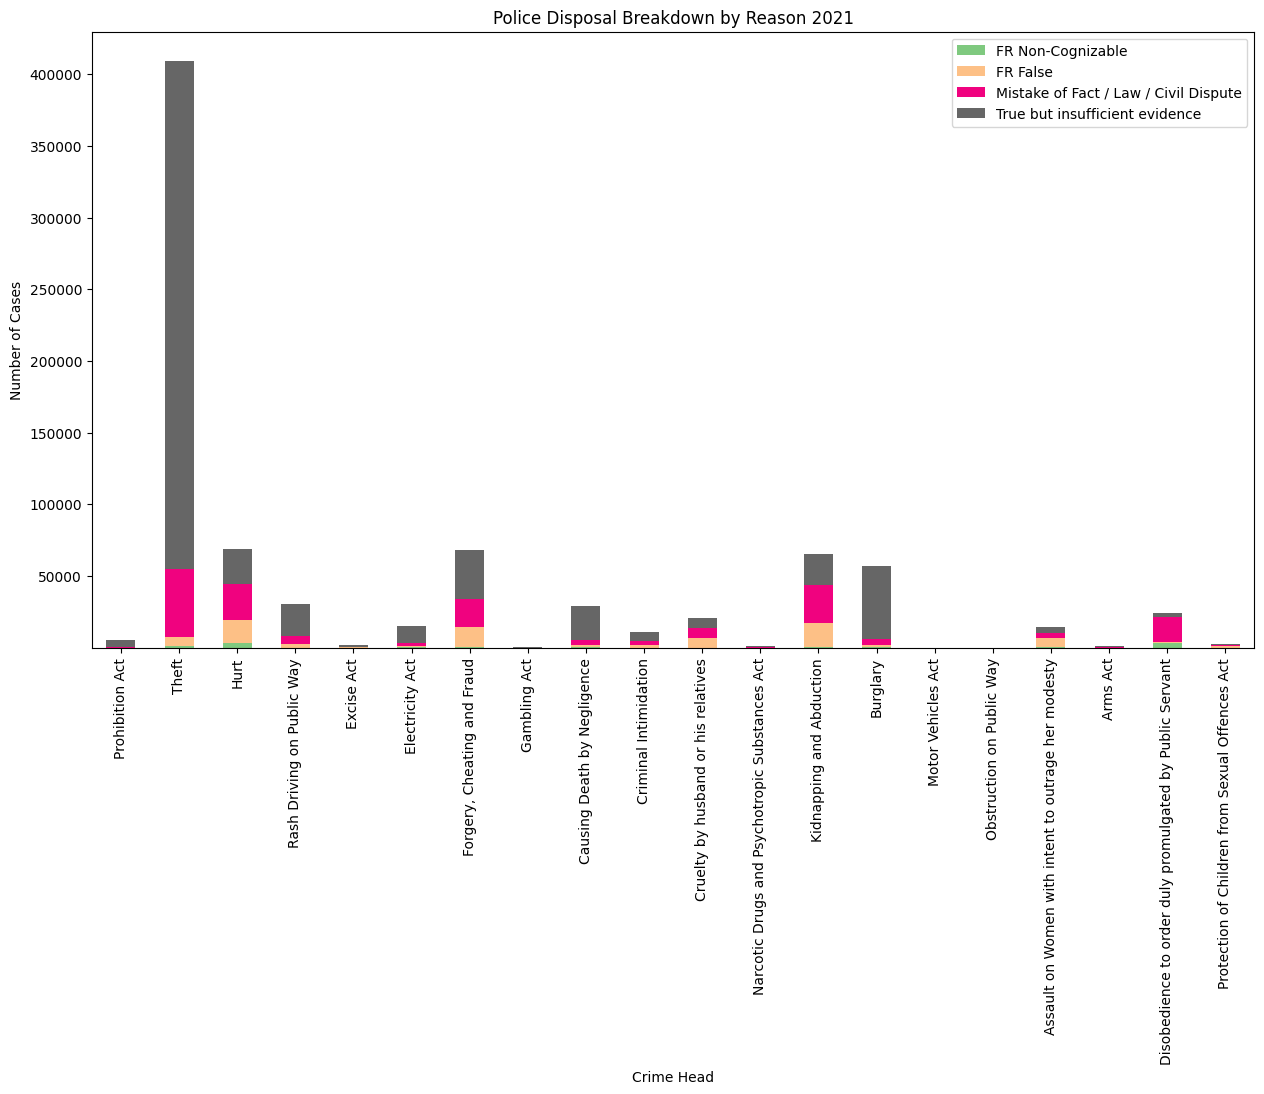

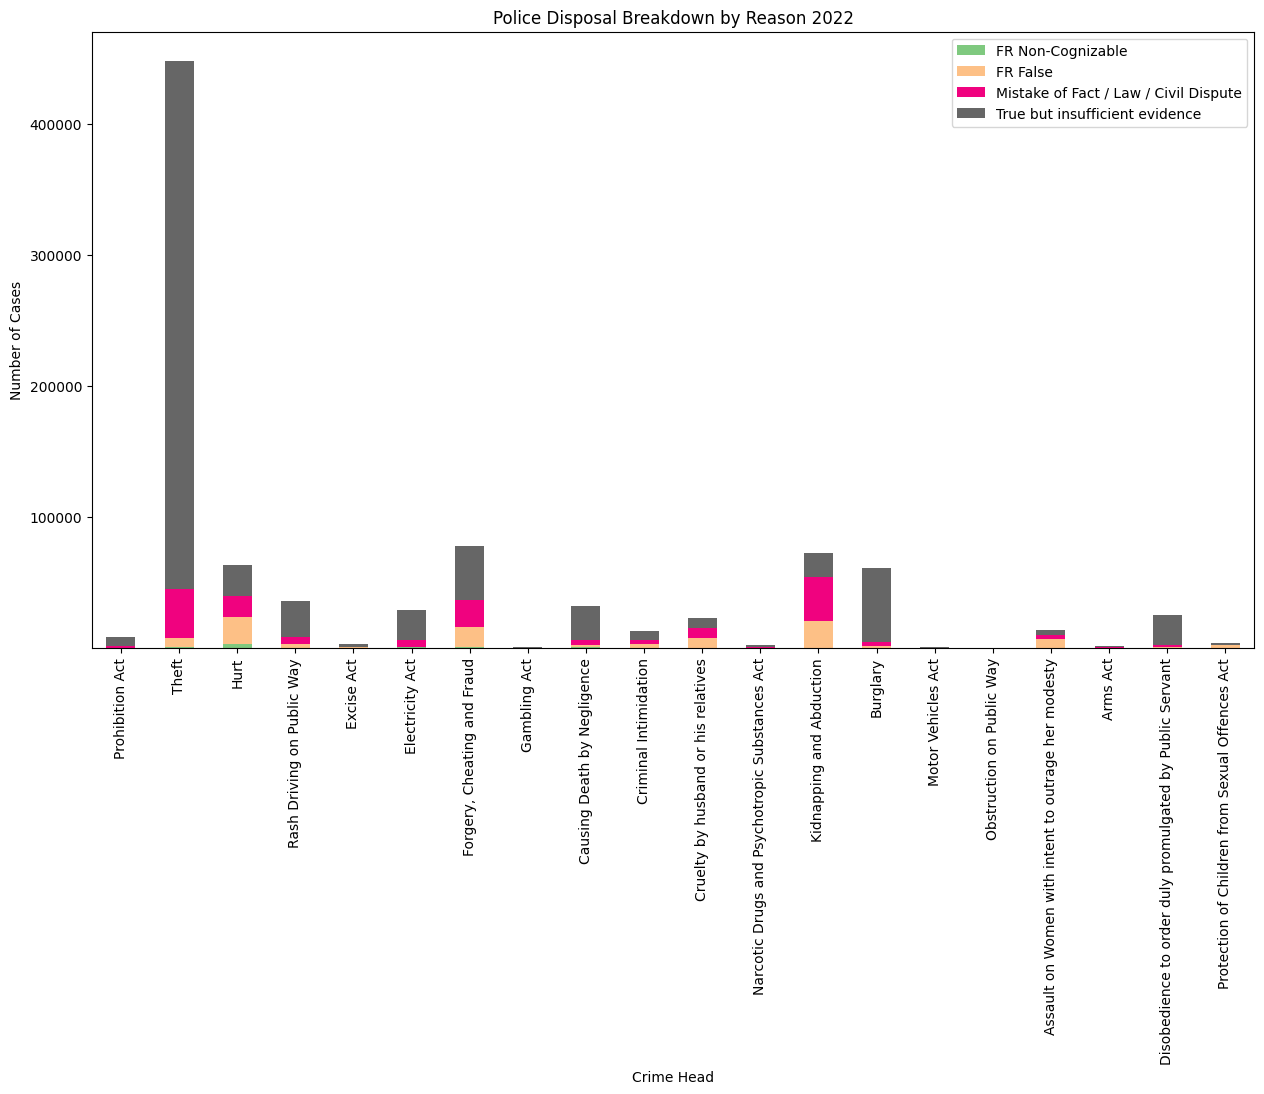

In [4]:
# Select relevant columns for police disposal reasons
police_disposal_categories = police_disposal_2021[['Crime Head', 'FR Non-Cognizable', 'FR False',
                                                   'Mistake of Fact / Law / Civil Dispute',
                                                   'True but insufficient evidence']]

# Set index and plot stacked bar chart
police_disposal_categories.set_index('Crime Head').plot(kind='bar', stacked=True, figsize=(15, 8), colormap='Accent')
plt.title('Police Disposal Breakdown by Reason 2021')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()

# Select relevant columns for police disposal reasons
police_disposal_categories = police_disposal_2022[['Crime Head', 'FR Non-Cognizable', 'FR False',
                                                   'Mistake of Fact / Law / Civil Dispute',
                                                   'True but insufficient evidence']]

# Set index and plot stacked bar chart
police_disposal_categories.set_index('Crime Head').plot(kind='bar', stacked=True, figsize=(15, 8), colormap='Accent')
plt.title('Police Disposal Breakdown by Reason 2022')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()

3. **Court Disposal Breakdown by Outcome**

•	Plot: Stacked bar chart or grouped bar chart comparing different court outcomes per crime head, such as Convicted, Discharged, Acquitted, and Compromised.

•	Objective: Understand court outcomes for various crime heads, highlighting which crimes have higher conviction rates versus acquittal or discharge rates.

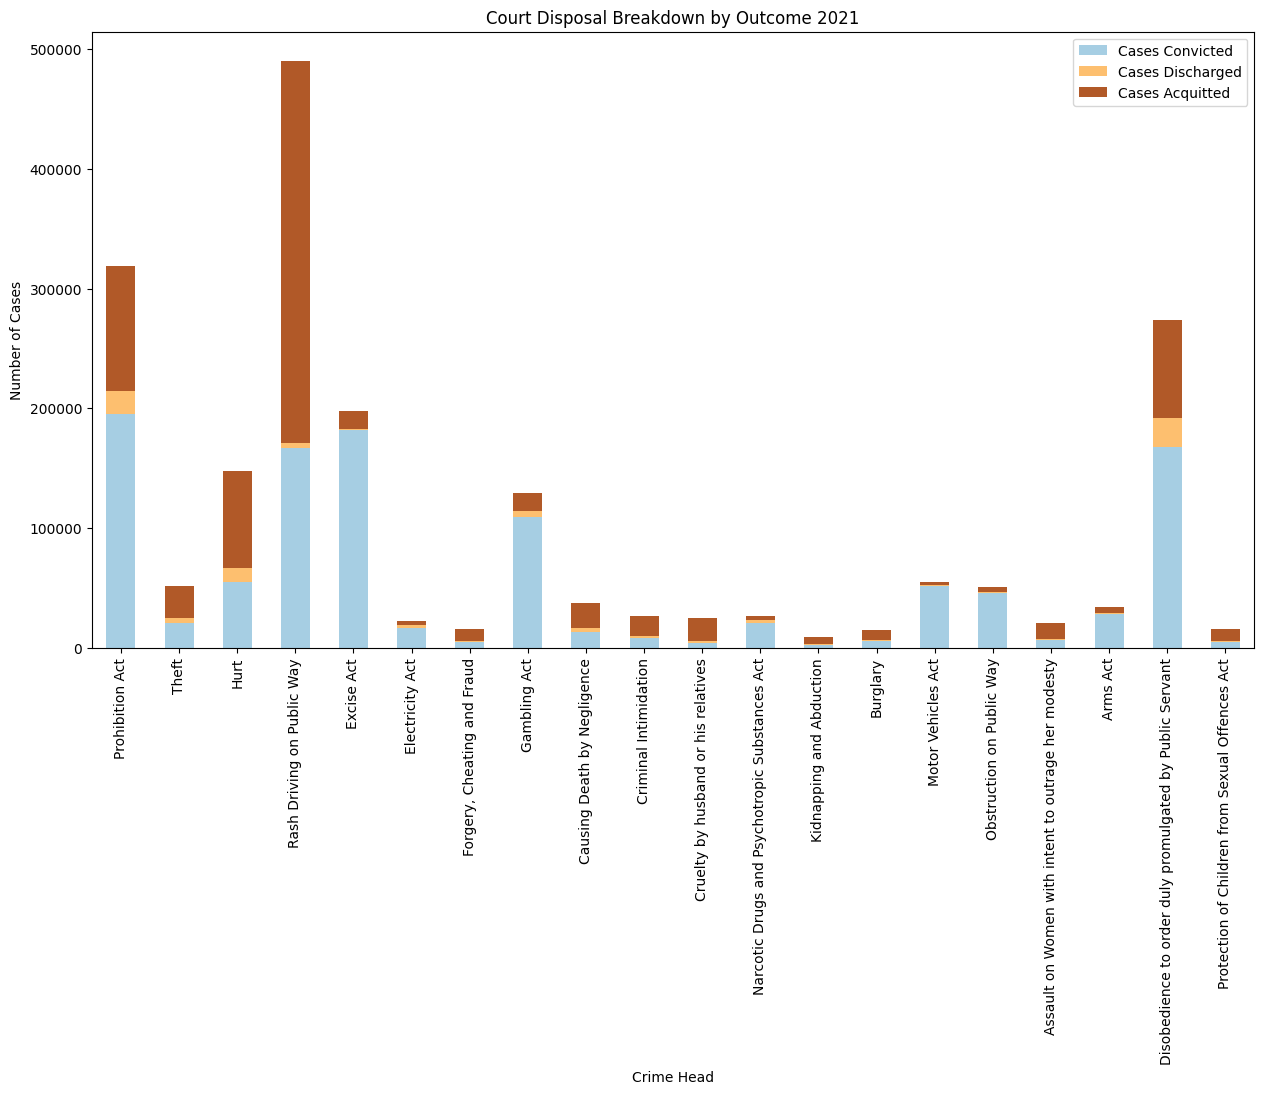

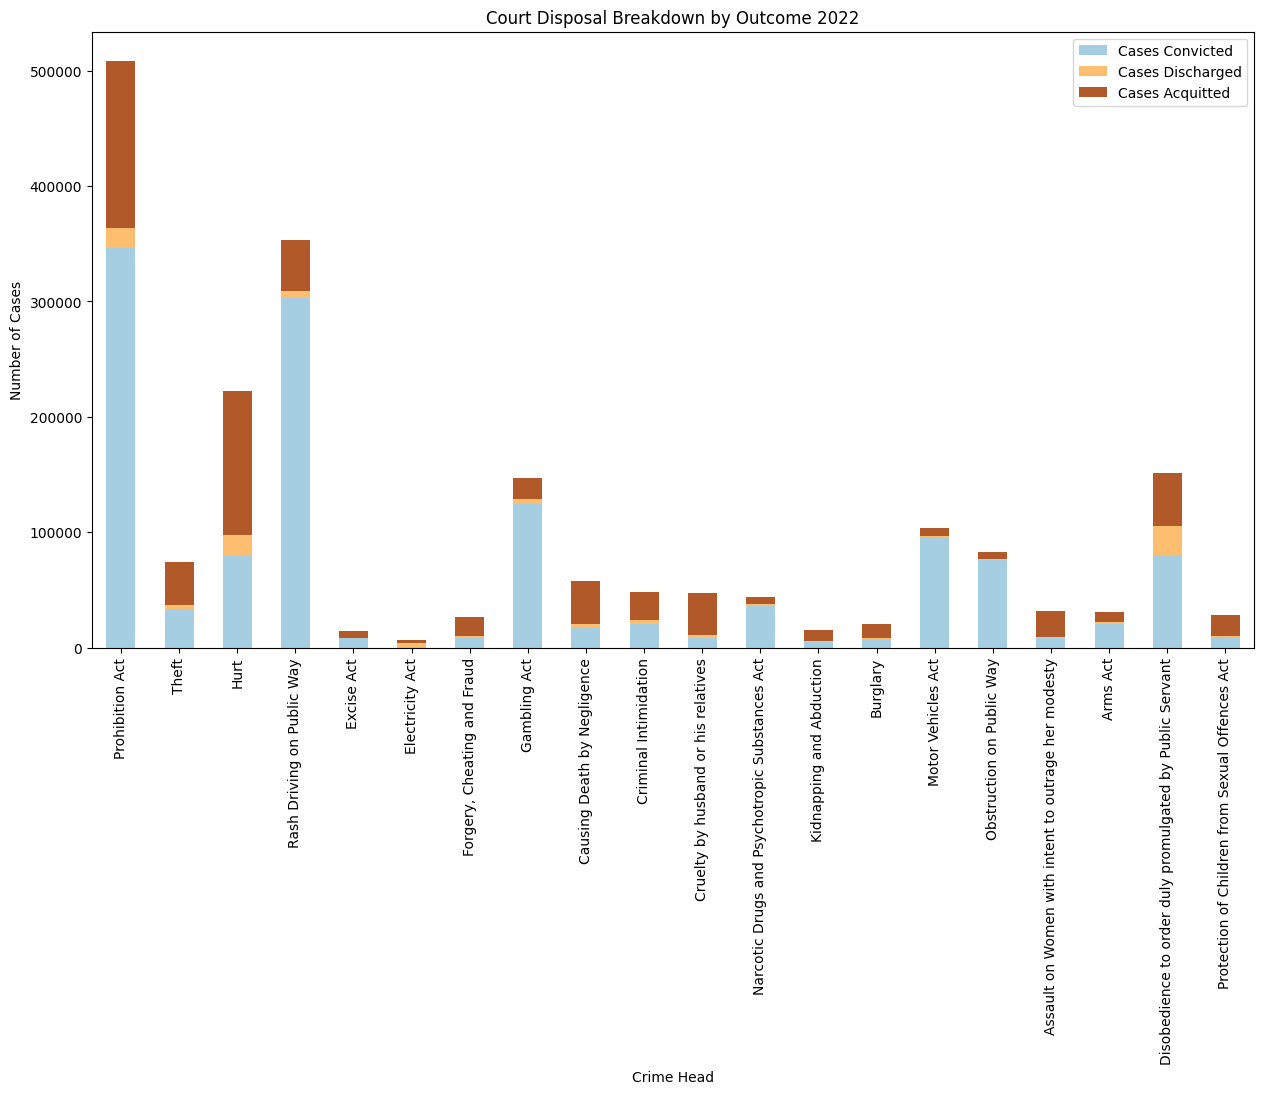

In [5]:
# Select relevant columns for court outcomes
court_outcomes = court_disposal_2021[['Crime Head', 'Cases Convicted', 'Cases Discharged', 'Cases Acquitted']]

# Set index and plot stacked bar chart
court_outcomes.set_index('Crime Head').plot(kind='bar', stacked=True, figsize=(15, 8), colormap='Paired')
plt.title('Court Disposal Breakdown by Outcome 2021')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()

# Select relevant columns for court outcomes
court_outcomes = court_disposal_2022[['Crime Head', 'Cases Convicted', 'Cases Discharged', 'Cases Acquitted']]

# Set index and plot stacked bar chart
court_outcomes.set_index('Crime Head').plot(kind='bar', stacked=True, figsize=(15, 8), colormap='Paired')
plt.title('Court Disposal Breakdown by Outcome 2022')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()



4. **Trial Completion Rate**

•	Plot: Line or bar chart showing the Cases Where Trials Were Completed as a percentage of Total # Cases Disposed Off by Courts for each crime head.

•	Objective: Identify which crime heads have a higher or lower trial completion rate, indicating efficiency in court processes for those cases.

<ipython-input-6-c204a077f1ec>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_data21, x='Crime Head', y='Trial Completion Rate (%)', palette='copper')


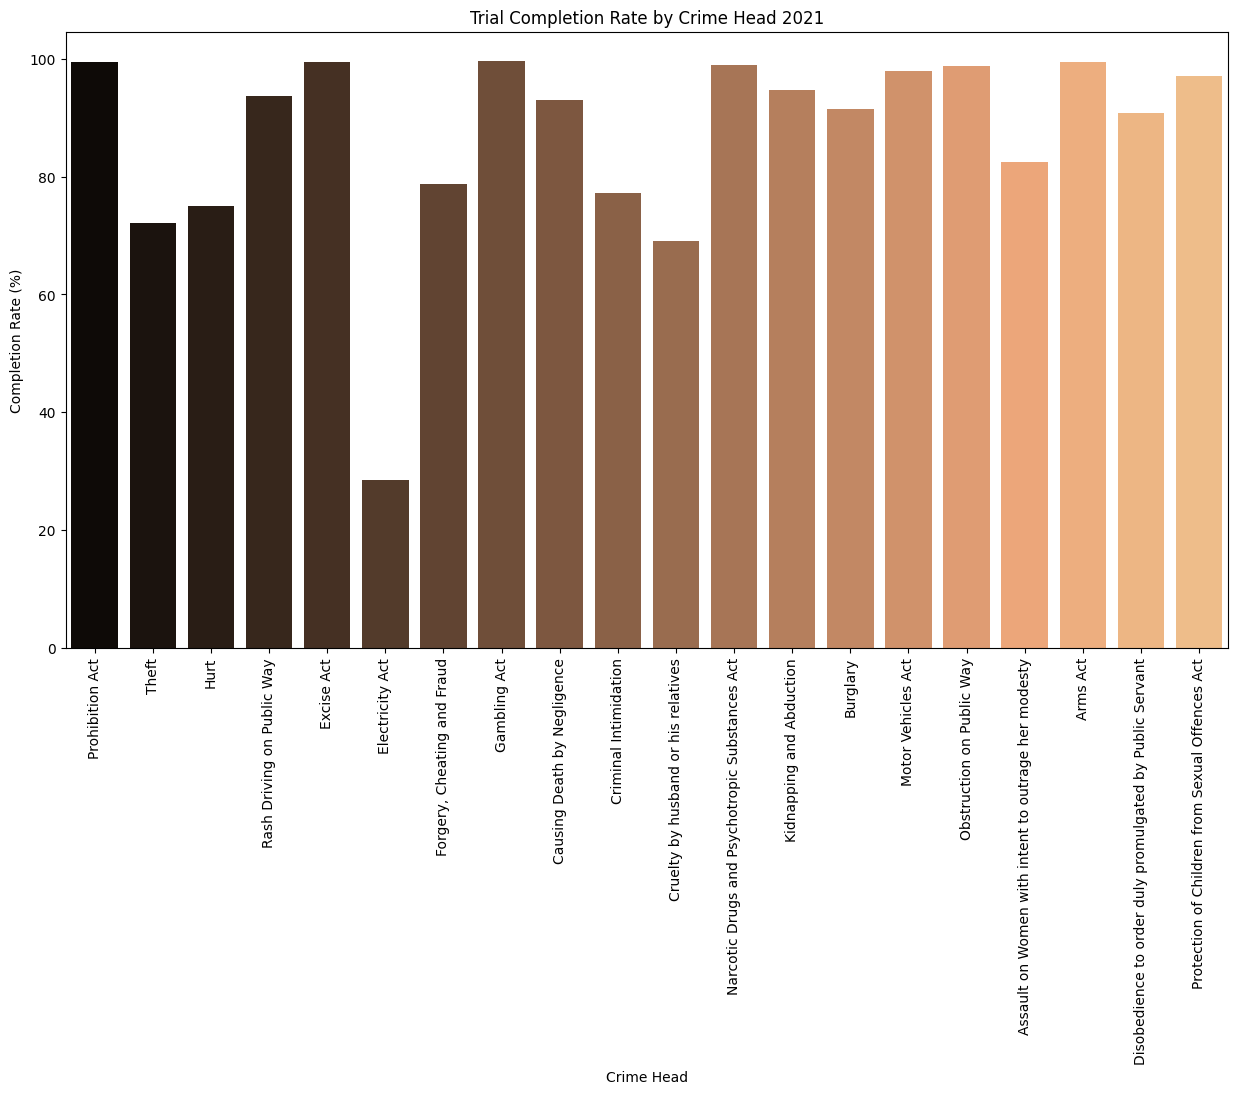

<ipython-input-6-c204a077f1ec>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_data22, x='Crime Head', y='Trial Completion Rate (%)', palette='copper')


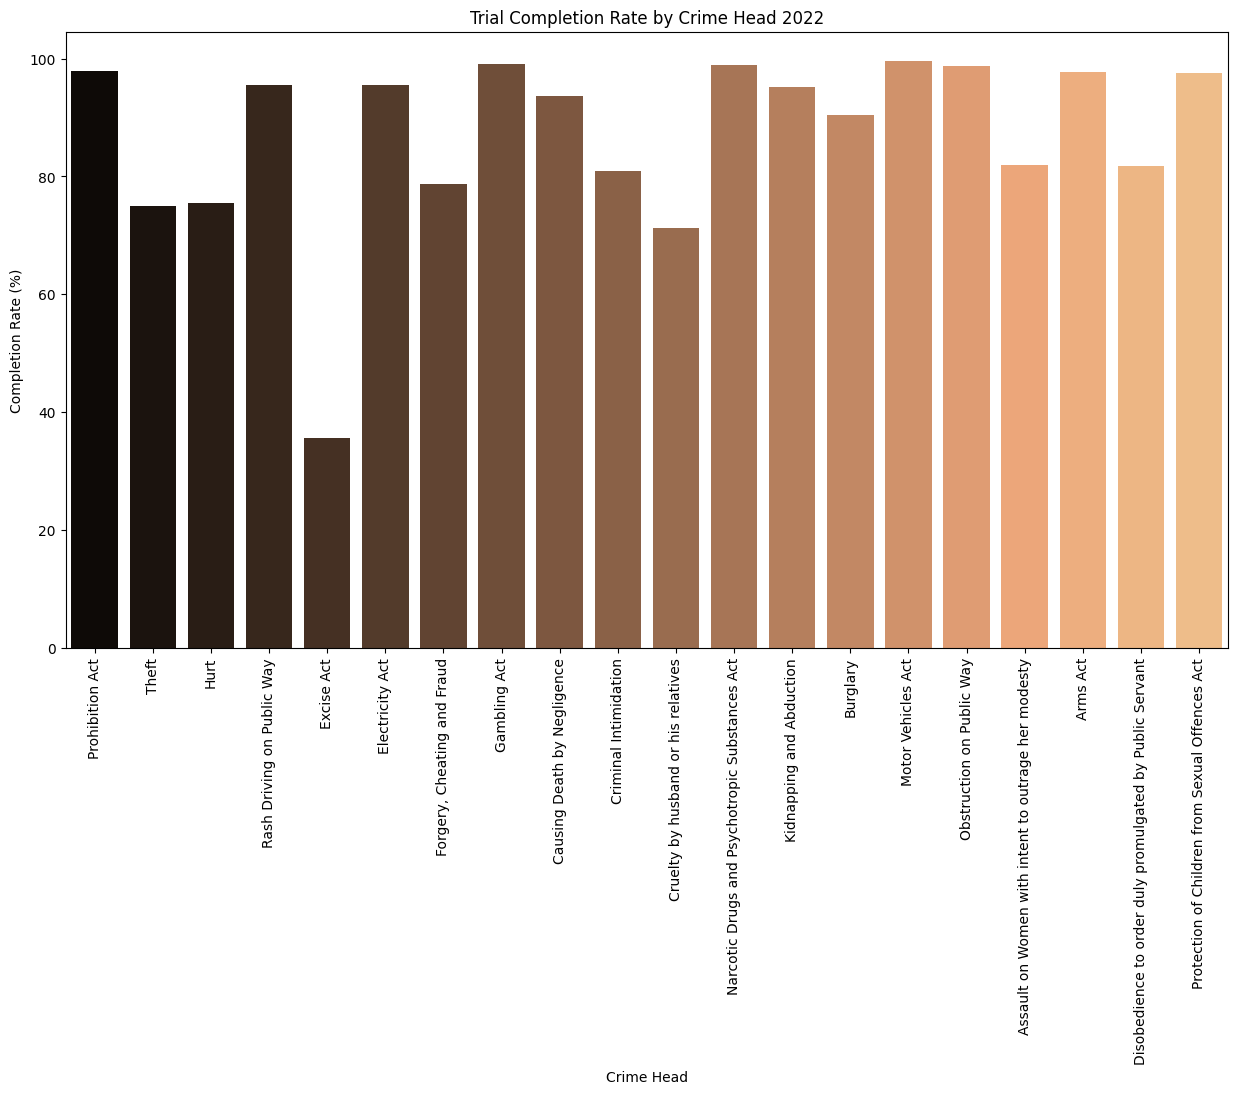

In [6]:
# Calculate trial completion rate
merged_data21['Trial Completion Rate (%)'] = (merged_data21['Cases Where Trials Were Completed'] /
                                             merged_data21['Total # Cases Disposed Off by Courts']) * 100

# Plot trial completion rate
plt.figure(figsize=(15, 8))
sns.barplot(data=merged_data21, x='Crime Head', y='Trial Completion Rate (%)', palette='copper')
plt.title('Trial Completion Rate by Crime Head 2021')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=90)
plt.show()

# Calculate trial completion rate
merged_data22['Trial Completion Rate (%)'] = (merged_data22['Cases Where Trials Were Completed'] /
                                             merged_data22['Total # Cases Disposed Off by Courts']) * 100

# Plot trial completion rate
plt.figure(figsize=(15, 8))
sns.barplot(data=merged_data22, x='Crime Head', y='Trial Completion Rate (%)', palette='copper')
plt.title('Trial Completion Rate by Crime Head 2022')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=90)
plt.show()

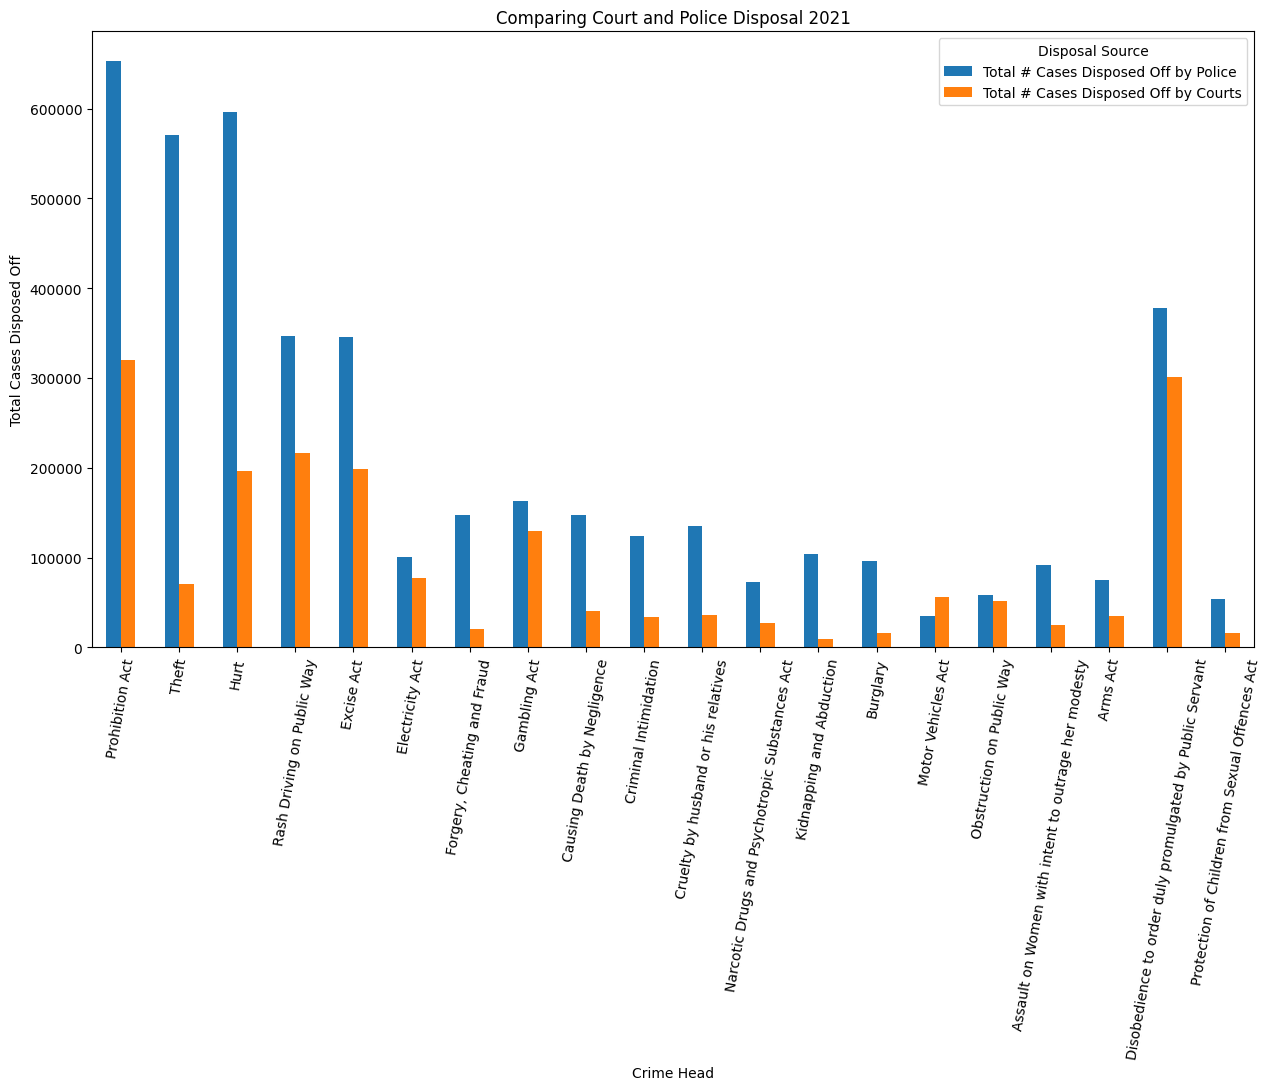

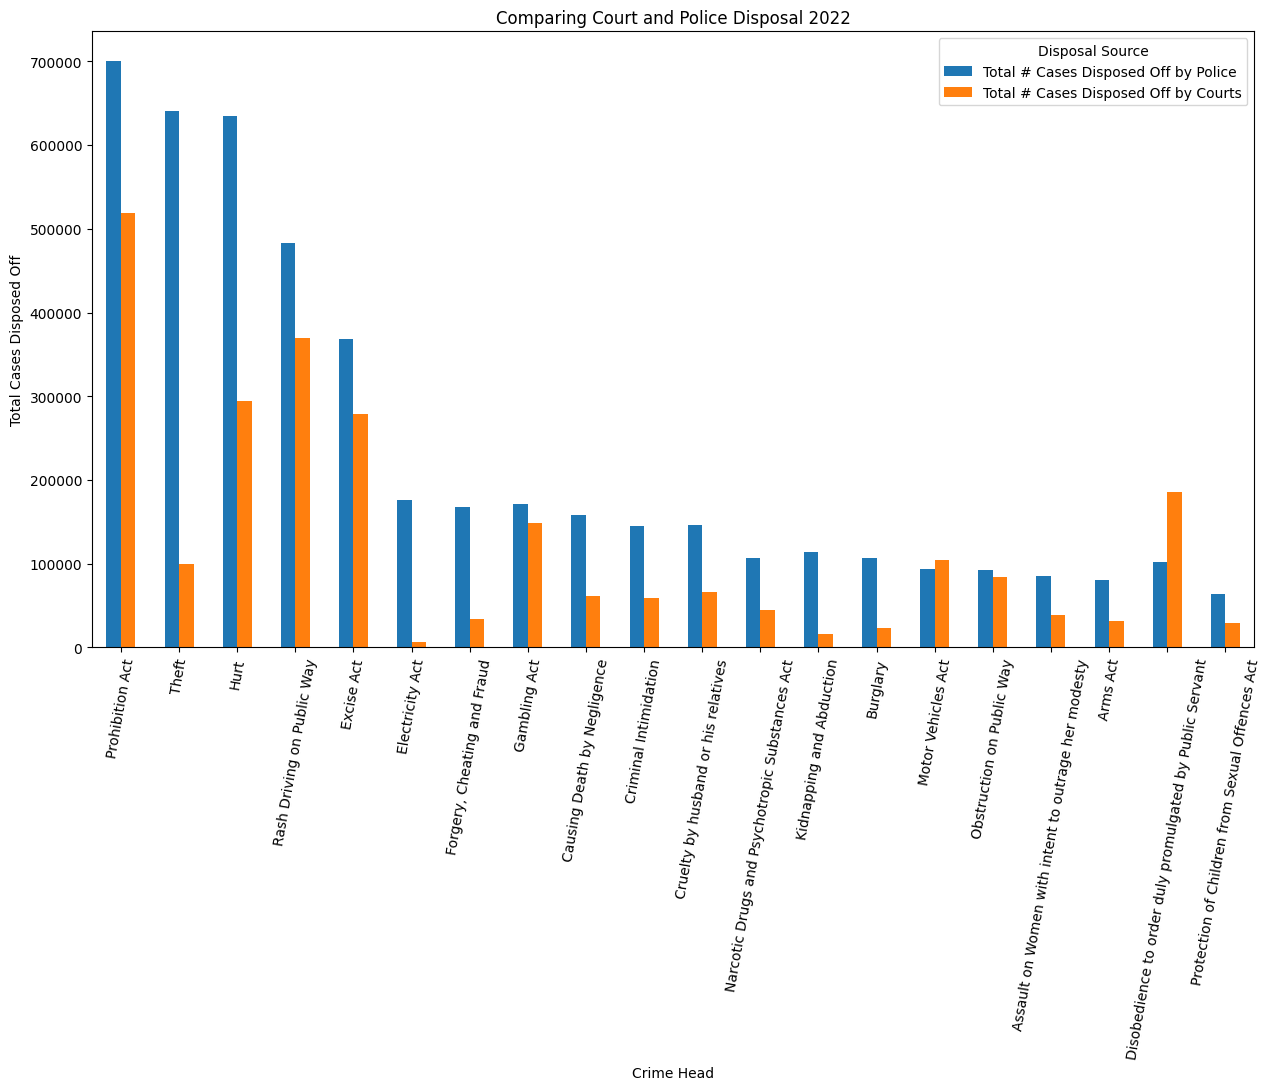

In [7]:
# Plot side-by-side bar charts comparing total cases disposed off by police vs courts
comparison = merged_data21[['Crime Head', 'Total # Cases Disposed Off by Police', 'Total # Cases Disposed Off by Courts']]
comparison.set_index('Crime Head').plot(kind='bar',figsize=(15, 8))
plt.title('Comparing Court and Police Disposal 2021')
plt.ylabel('Total Cases Disposed Off')
plt.xticks(rotation=80)
plt.legend(title='Disposal Source')
plt.show()

# Plot side-by-side bar charts comparing total cases disposed off by police vs courts
comparison = merged_data22[['Crime Head', 'Total # Cases Disposed Off by Police', 'Total # Cases Disposed Off by Courts']]
comparison.set_index('Crime Head').plot(kind='bar',figsize=(15, 8))
plt.title('Comparing Court and Police Disposal 2022')
plt.ylabel('Total Cases Disposed Off')
plt.xticks(rotation=80)
plt.legend(title='Disposal Source')
plt.show()

<ipython-input-8-5f92c6a6fdb9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_data21, x='Crime Head', y='Conviction to Acquittal Ratio', palette='Set2')


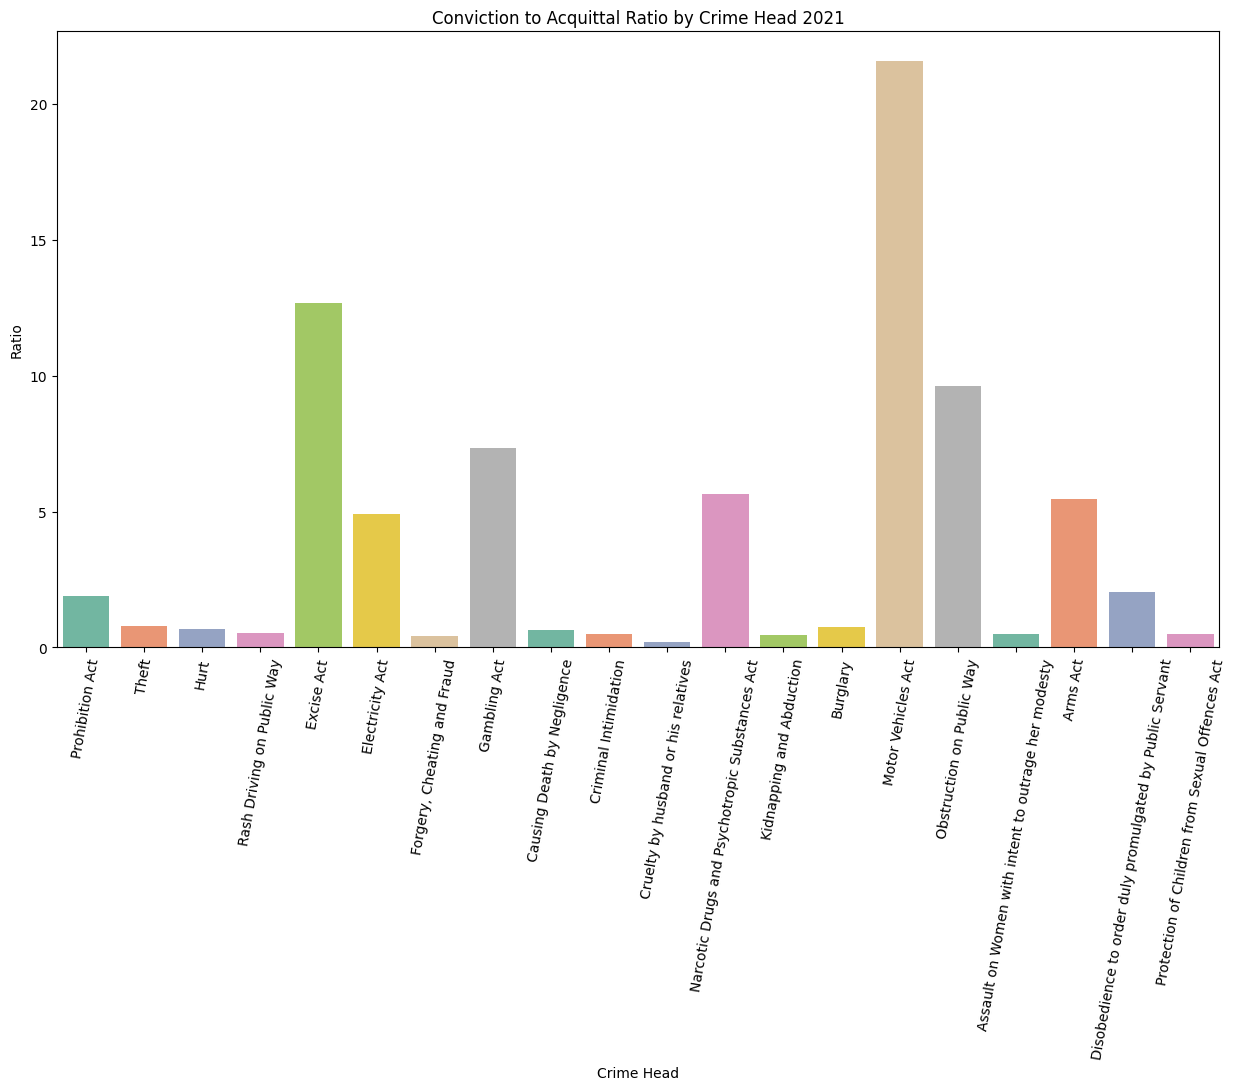

<ipython-input-8-5f92c6a6fdb9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_data22, x='Crime Head', y='Conviction to Acquittal Ratio', palette='Set2')


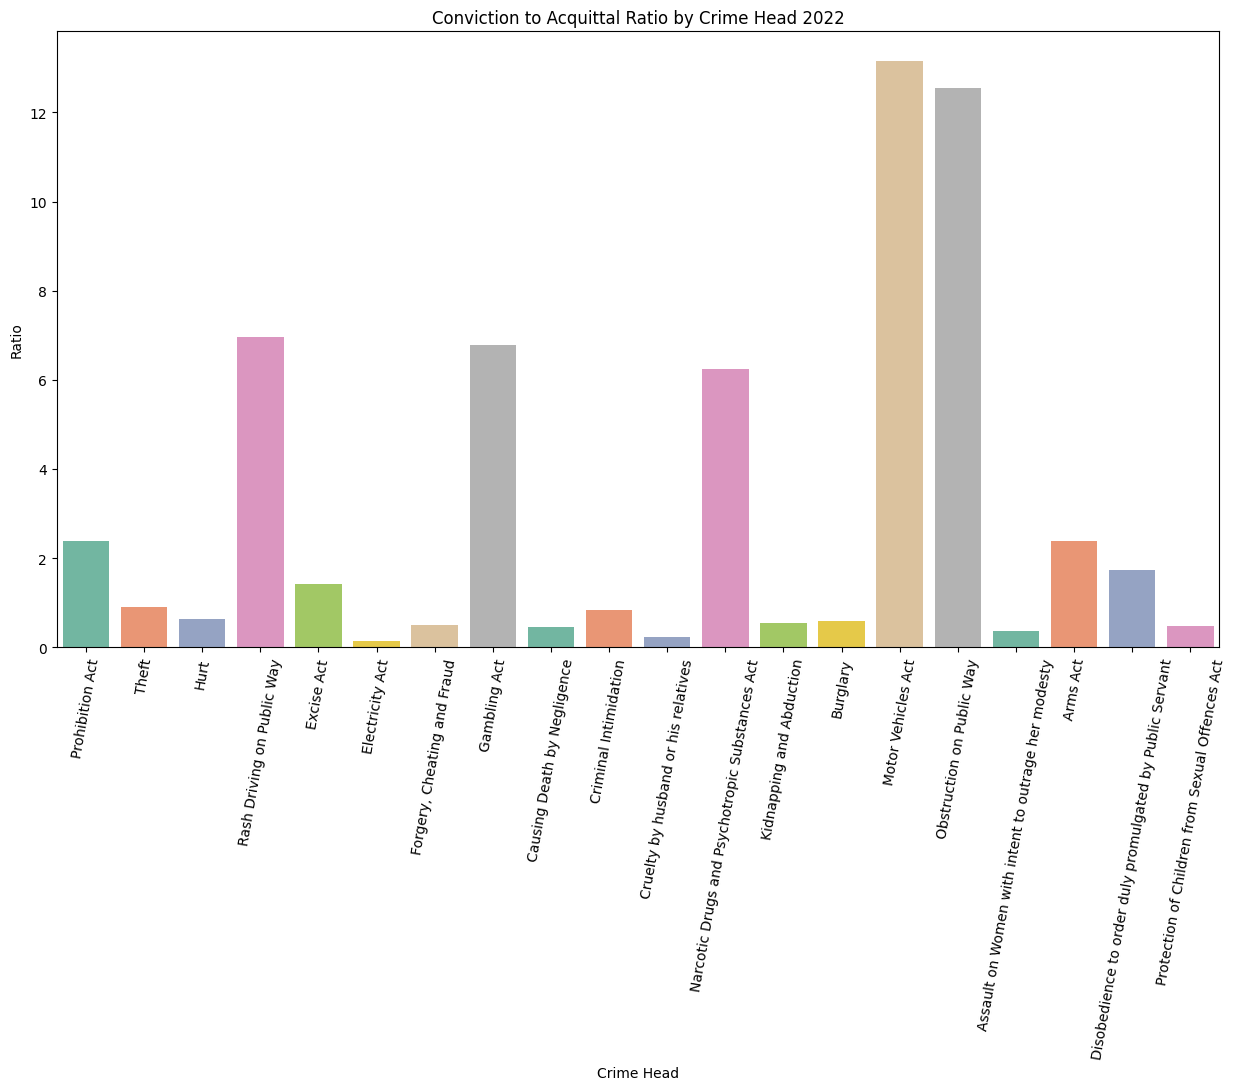

In [8]:
# Calculate conviction to acquittal ratio
merged_data21['Conviction to Acquittal Ratio'] = merged_data21['Cases Convicted'] / (merged_data21['Cases Acquitted'] + 1) # Avoid division by zero

# Plot conviction to acquittal ratio
plt.figure(figsize=(15, 8))
sns.barplot(data=merged_data21, x='Crime Head', y='Conviction to Acquittal Ratio', palette='Set2')
plt.title('Conviction to Acquittal Ratio by Crime Head 2021')
plt.ylabel('Ratio')
plt.xticks(rotation=80)
plt.show()

# Calculate conviction to acquittal ratio
merged_data22['Conviction to Acquittal Ratio'] = merged_data22['Cases Convicted'] / (merged_data22['Cases Acquitted'] + 1) # Avoid division by zero

# Plot conviction to acquittal ratio
plt.figure(figsize=(15, 8))
sns.barplot(data=merged_data22, x='Crime Head', y='Conviction to Acquittal Ratio', palette='Set2')
plt.title('Conviction to Acquittal Ratio by Crime Head 2022')
plt.ylabel('Ratio')
plt.xticks(rotation=80)
plt.show()

<ipython-input-9-bf27e5a48be7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_data21, x='Crime Head', y='Cases Disposed Off Without Trial', palette='muted')


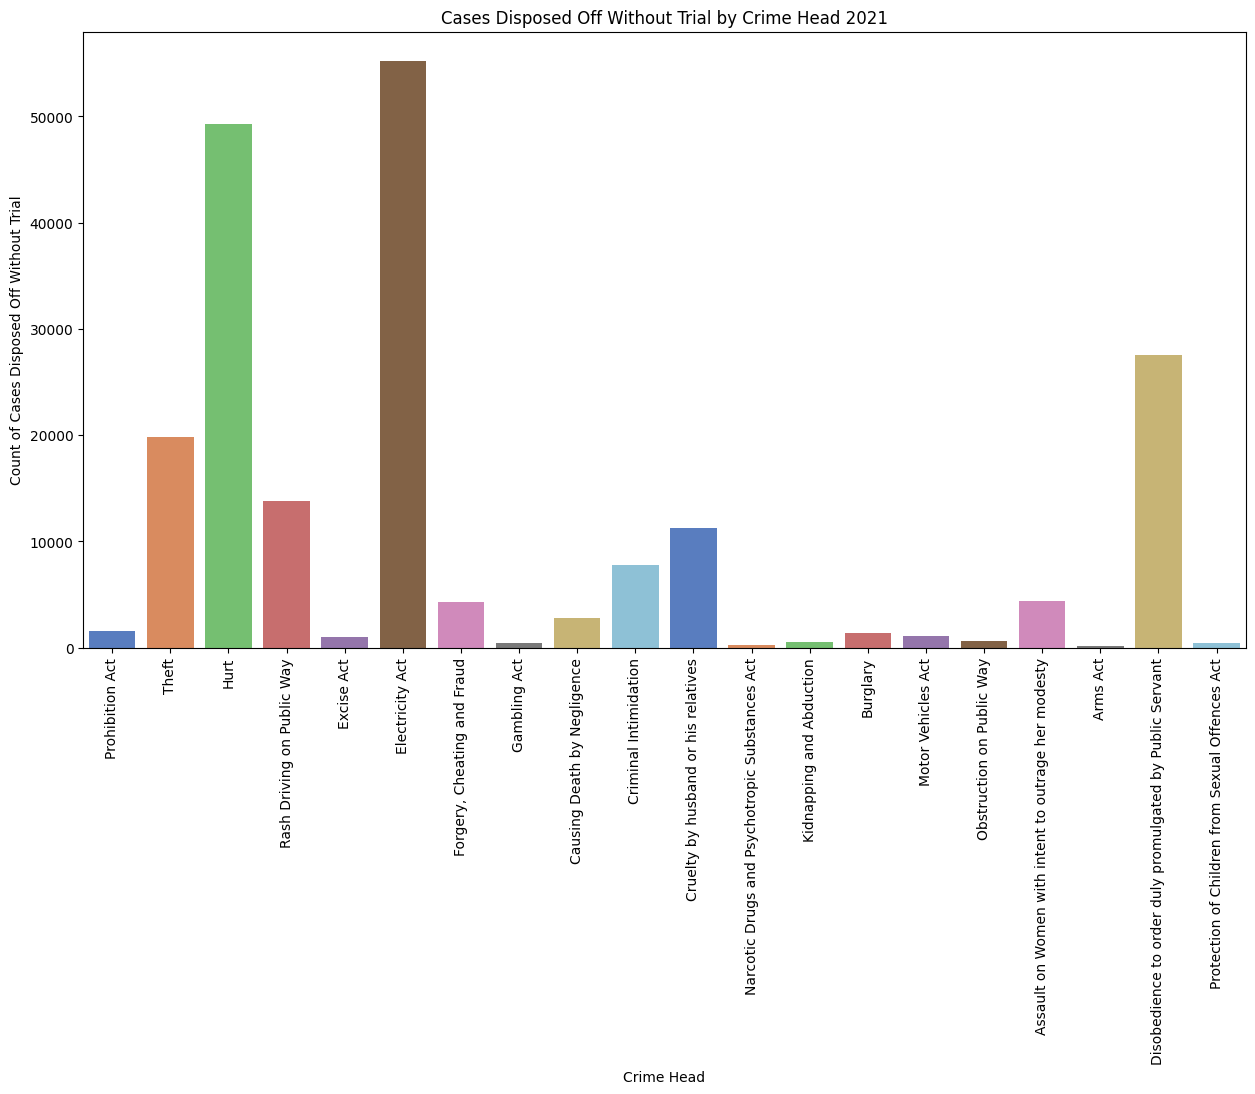

<ipython-input-9-bf27e5a48be7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_data22, x='Crime Head', y='Cases Disposed Off Without Trial', palette='muted')


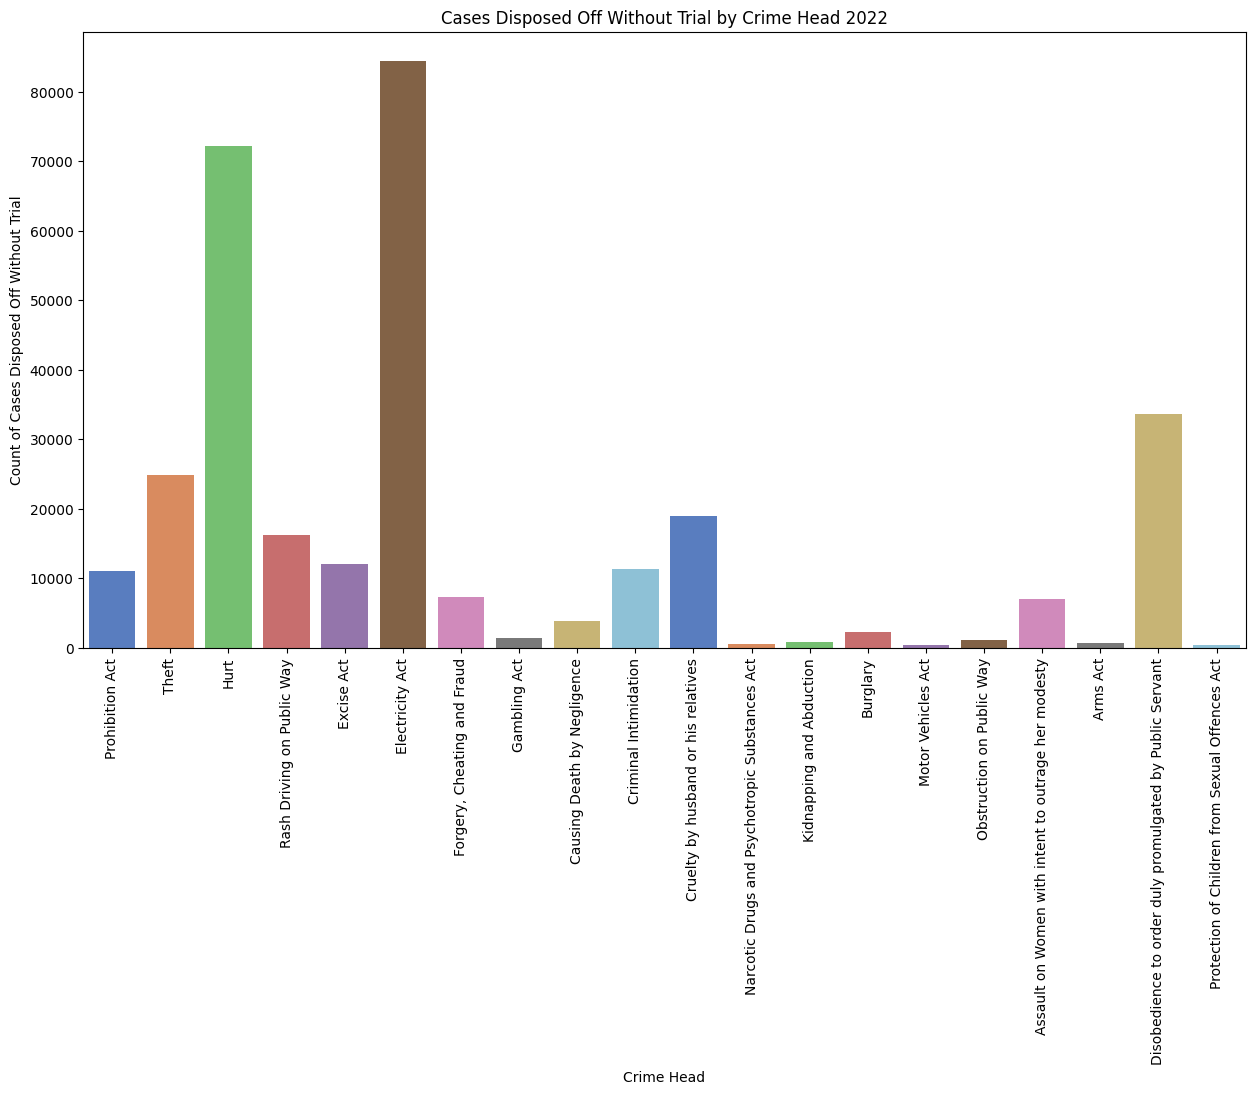

In [9]:
# Plot cases disposed off without trial for each crime head
plt.figure(figsize=(15, 8))
sns.barplot(data=merged_data21, x='Crime Head', y='Cases Disposed Off Without Trial', palette='muted')
plt.title('Cases Disposed Off Without Trial by Crime Head 2021')
plt.ylabel('Count of Cases Disposed Off Without Trial')
plt.xticks(rotation=90)
plt.show()
# Plot cases disposed off without trial for each crime head
plt.figure(figsize=(15, 8))
sns.barplot(data=merged_data22, x='Crime Head', y='Cases Disposed Off Without Trial', palette='muted')
plt.title('Cases Disposed Off Without Trial by Crime Head 2022')
plt.ylabel('Count of Cases Disposed Off Without Trial')
plt.xticks(rotation=90)
plt.show()